## LEAD SCORE CASE STUDY

##### Group - Tresa Shetey, Aditya Chougule & Vijay Kumar Jha

X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with a higher lead score have a higher conversion chance and the customers with a lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

### Import Necessary Libraries

In [1]:
# Lets start by import the necessary libraries needed to work and build the Model

# To read the data
import numpy as np
import pandas as pd

# For Visualisation of Data 
import matplotlib.pyplot as plt
import seaborn as sns

# To Ignore Warnings
import warnings
warnings.filterwarnings('ignore')

# libraries to build and evaluate the model.
from sklearn.model_selection import train_test_split    # To split data in train set and test set
from sklearn.preprocessing import StandardScaler          # For standardising and scaling the Numerical data
import statsmodels.api as sm                            # For building stats model
from sklearn.feature_selection import RFE               # For feature elimination
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor   # Check VIF values of variables

# To compute accuracy score and Confusion Matrix
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve
plt.style.use('ggplot')

In [2]:
# Altering output Display
pd.set_option('display.max_columns',50)
pd.set_option('display.max_rows',300)
pd.set_option('display.max_colwidth',0)

###  Step 1 Reading the Data.

In [3]:
df_leads=pd.read_csv('Leads.csv')

In [4]:
df_leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [5]:
df_leads.tail()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
9235,19d6451e-fcd6-407c-b83b-48e1af805ea9,579564,Landing Page Submission,Direct Traffic,Yes,No,1,8.0,1845,2.67,Email Marked Spam,Saudi Arabia,IT Projects Management,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,High in Relevance,No,No,Potential Lead,Mumbai,02.Medium,01.High,15.0,17.0,No,No,Email Marked Spam
9236,82a7005b-7196-4d56-95ce-a79f937a158d,579546,Landing Page Submission,Direct Traffic,No,No,0,2.0,238,2.00,SMS Sent,India,Media and Advertising,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,wrong number given,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,19.0,No,Yes,SMS Sent
9237,aac550fe-a586-452d-8d3c-f1b62c94e02c,579545,Landing Page Submission,Direct Traffic,Yes,No,0,2.0,199,2.00,SMS Sent,India,Business Administration,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,invalid number,Not Sure,No,No,Potential Lead,Mumbai,02.Medium,01.High,13.0,20.0,No,Yes,SMS Sent
9238,5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9,579538,Landing Page Submission,Google,No,No,1,3.0,499,3.00,SMS Sent,India,Human Resource Management,Online Search,NaN,NaN,No,No,No,No,No,No,No,No,NaN,NaN,No,No,NaN,Other Metro Cities,02.Medium,02.Medium,15.0,16.0,No,No,SMS Sent
9239,571b5c8e-a5b2-4d57-8574-f2ffb06fdeff,579533,Landing Page Submission,Direct Traffic,No,No,1,6.0,1279,3.00,SMS Sent,Bangladesh,Supply Chain Management,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Other Cities,02.Medium,01.High,15.0,18.0,No,Yes,Modified


### Step 2  Inspecting the Dataframe

In [6]:
# Check the Dimensions of the DataFrame
df_leads.shape            

(9240, 37)

We see there are 9240 rows and 37 columns

In [7]:
# Lets check the type of data available in the DataFrame (datatype, missing values present).
df_leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [8]:
# Check the Statistical Aspects of the DataFrame
df_leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


### Step 3 Data Preparation

#### 3.1 Check for Duplicates

In [9]:
df_leads.duplicated().sum()

0

No Duplicates found

In [10]:
for col in df_leads.iloc[:,1:].select_dtypes(include='object').columns:
    print(col)
    print("------------------------------------------------------------------------")
    print(df_leads[col].value_counts(normalize=True))
    print("------------------------------------------------------------------------")

Lead Origin
------------------------------------------------------------------------
Landing Page Submission    0.528788
API                        0.387446
Lead Add Form              0.077706
Lead Import                0.005952
Quick Add Form             0.000108
Name: Lead Origin, dtype: float64
------------------------------------------------------------------------
Lead Source
------------------------------------------------------------------------
Google               0.311604
Direct Traffic       0.276293
Olark Chat           0.190678
Organic Search       0.125380
Reference            0.058018
Welingak Website     0.015428
Referral Sites       0.013581
Facebook             0.005976
bing                 0.000652
google               0.000543
Click2call           0.000435
Press_Release        0.000217
Social Media         0.000217
Live Chat            0.000217
youtubechannel       0.000109
testone              0.000109
Pay per Click Ads    0.000109
welearnblog_Home     0.000109
WeL

In [11]:
# Converting Binary variables(Yes/No) to (0/1)
binr_lst=['Do Not Email','A free copy of Mastering The Interview']

# Define the Map function for Binary conversion
def binr_map(x):
    return x.map({'Yes':1, 'No':0})

df_leads[binr_lst]=df_leads[binr_lst].apply(binr_map)

In [12]:
# Check whether the binary codes are implemented
df_leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,0,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,0,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,1,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,0,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,0,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,0,Modified


#### 3.2 Check for Missing Values and its Treatments

In [13]:
# Check for percentage null values in columns.
Null_cols=round(100*(df_leads.isnull().sum()/len(df_leads.index)),2)
print(Null_cols[Null_cols>0])

Lead Source                                      0.39 
TotalVisits                                      1.48 
Page Views Per Visit                             1.48 
Last Activity                                    1.11 
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Tags                                             36.29
Lead Quality                                     51.59
Lead Profile                                     29.32
City                                             15.37
Asymmetrique Activity Index                      45.65
Asymmetrique Profile Index                       45.65
Asymmetrique Activity Score                      45.65
Asymmetrique Profile Score                       45.65
dtype: float64


In [14]:
# Dropping values having <= 45% null Values,  as it is not feasible to impute values for such columns.
cols=df_leads.columns

for i in cols:
    if((100*(df_leads[i].isnull().sum()/len(df_leads.index)))>=45):
        df_leads.drop(i, 1, inplace=True)

In [15]:
round(100*(df_leads.isnull().sum()/len(df_leads.index)),2)

Prospect ID                                      0.00 
Lead Number                                      0.00 
Lead Origin                                      0.00 
Lead Source                                      0.39 
Do Not Email                                     0.00 
Do Not Call                                      0.00 
Converted                                        0.00 
TotalVisits                                      1.48 
Total Time Spent on Website                      0.00 
Page Views Per Visit                             1.48 
Last Activity                                    1.11 
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                           0.00 
Magazine                                         0.00 
Newspaper 

Note : As we see too many variations in the columns('Asymmetrique Activity Index',
       'Asymmetrique Profile Index','Asymmetrique Activity Score','Asymmetrique Profile Score') it would not make sense to impute
       any values, also the missing values for these columns stands at 45% and hence we are dropping these columns.

In [16]:
# To check if the said columns have been deleted.
df_leads.shape

(9240, 32)

Note: From the above numbers it is seen that most of the data belongs to country='India' and next is 'NAN'
      It will be implausible to draw any inferences from it.So we will goahead and drop the country column.

Lets drop Prospect ID as we have Lead Number that's unique per ID
We will also drop below columns as they are constant across all rows,They would not add value to the model

In [17]:
# Lets remove some columns that would not be a valuable contribution in the model:
df_leads=df_leads.drop('Prospect ID', axis=1)
df_leads=df_leads.drop('Country', axis=1)
df_leads=df_leads.drop('Do Not Call', axis=1)
df_leads=df_leads.drop('Magazine', axis=1)
df_leads=df_leads.drop('Newspaper Article', axis=1)
df_leads=df_leads.drop('How did you hear about X Education', axis=1)
df_leads=df_leads.drop('What matters most to you in choosing a course', axis=1)
df_leads=df_leads.drop('Receive More Updates About Our Courses', axis=1)
df_leads=df_leads.drop('Update me on Supply Chain Content', axis=1)
df_leads=df_leads.drop('Get updates on DM Content', axis=1)
df_leads=df_leads.drop('I agree to pay the amount through cheque', axis=1)

In [18]:
# Drop the rows which are having very less null values
df_leads=df_leads[-df_leads['Lead Source'].isnull()].copy()
df_leads=df_leads[-df_leads['TotalVisits'].isnull()].copy()
df_leads=df_leads[-df_leads['Page Views Per Visit'].isnull()].copy()
df_leads=df_leads[-df_leads['Last Activity'].isnull()].copy()

In [19]:
df_leads.shape

(9074, 21)

#### 3.3 Replacing Select with NAN

In [20]:
df_leads['Specialization']=df_leads['Specialization'].replace(np.nan, 'Not Specified')

In [21]:
df_leads['What is your current occupation']=df_leads['What is your current occupation'].replace(np.nan, 'Unemployed')

In [22]:
df_leads['Tags']=df_leads['Tags'].replace(np.nan, 'Not Specified')

In [23]:
df_leads['Lead Source']=df_leads['Lead Source'].replace(np.nan, 'Others')

In [24]:
df_leads['Last Activity']=df_leads['Last Activity'].replace(np.nan, 'Others')

In [25]:
# As we see in the above columns we have select which forms the major part so we will replace it with NUll
#df_leads=df_leads.replace('Select', np.nan)

In [26]:
df_leads['City']=df_leads['City'].replace(np.nan, 'Others')

In [27]:
# Replace Lead Add Form, Lead Import & Quick Add Form as 'Other Forms'

df_leads['Lead Origin']=df_leads['Lead Origin'].replace(['Lead Add Form','Lead Import','Quick Add Form'], 'Other Forms')

In [28]:
df_leads['Tags']=df_leads['Tags'].replace(
                                            ['Closed by Horizzon','switched off','Busy','Lost to EINS',
                                             'Not doing further education','Interested  in full time MBA',
                                             'Graduation in progress','Diploma holder (Not Eligible)','Interest in full time MBA',
                                             'opp hangup','number not provided','to Others','Still Thinking','invalid number',
                                             'Want to take admission but has financial problems','Already a student',
                                             'In confusion whether part time or DLP','Interested in Next batch',
                                             'Lateral student','Shall take in the next coming month','wrong number given',
                                             'University not recognized','Recognition issue (DEC approval)'], 'Other_Tags')

In [29]:
df_leads['Specialization']=df_leads['Specialization'].replace(
                                            ['Finance Management','Human Resource Management','IT Projects Management',
                                             'Supply Chain Management','Marketing Management','Operations Management',
                                             'Healthcare Management','Hospitality Management','Retail Management'], 'Mgmt_Spec')

In [30]:
df_leads['Lead Source']=df_leads['Lead Source'].replace('Facebook', 'Social Media')
df_leads['Lead Source']=df_leads['Lead Source'].replace('google', 'Google')
df_leads['Lead Source']=df_leads['Lead Source'].replace(['bing','Click2call','Press_Release',
                                                         'youtubechannel','welearnblog_Home','Live Chat','WeLearn',
                                                         'blog','NC_EDM','Pay per Click Ads','testone'],'Others')

In [31]:
df_leads['Last Activity']=df_leads['Last Activity'].replace(['Unreachable','Unsubscribed','Had a Phone Conversation',
                                                             'Approached upfront','View in browser link Clicked',
                                                             'Email Received','Email Marked Spam',
                                                             'Visited Booth in Tradeshow','Resubscribed to emails'],'Others')

In [32]:
df_leads['Last Notable Activity']=df_leads['Last Notable Activity'].replace(['Email Link Clicked','Email Bounced',
                                                                             'Other_not_act','Unsubscribed','Unreachable',
                                                                             'Had a Phone Conversation','Email Marked Spam',
                                                                             'Approached upfront','Resubscribed to emails',
                                                                             'View in browser link Clicked','Form Submitted on Website',
                                                                             'Email Received'], 'Others_Notable_activity')

In [33]:
# The list of required cat_cols
cat_cols={'Lead Origin','Lead Source','Specialization','Do Not Email','Last Activity','A free copy of Mastering The Interview',
          'What is your current occupation','Tags','City','Last Notable Activity'}
# The List of numerical cols
num_cols={'TotalVisits','Total Time Spent on Website','Page Views Per Visit'}
# The target column
target_col={'Converted'}

In [34]:
# Lets fix the null values for these important columns
# Categorical Variables null values fix
for col in cat_cols:
    df_leads[col].fillna(df_leads[col].mode()[0], inplace=True)

In [35]:
Null_cols=round(100*(df_leads.isnull().sum()/len(df_leads.index)),2)
print(Null_cols)

Lead Number                               0.00 
Lead Origin                               0.00 
Lead Source                               0.00 
Do Not Email                              0.00 
Converted                                 0.00 
TotalVisits                               0.00 
Total Time Spent on Website               0.00 
Page Views Per Visit                      0.00 
Last Activity                             0.00 
Specialization                            0.00 
What is your current occupation           0.00 
Search                                    0.00 
X Education Forums                        0.00 
Newspaper                                 0.00 
Digital Advertisement                     0.00 
Through Recommendations                   0.00 
Tags                                      0.00 
Lead Profile                              29.78
City                                      0.00 
A free copy of Mastering The Interview    0.00 
Last Notable Activity                   

In [36]:
df_leads=df_leads[df_leads.isnull().sum(axis=1)<=10]
df_leads.shape

(9074, 21)

In [37]:
# To check for the distribution of Categorical Variables
col_list=['Lead Origin','Lead Source','Last Activity','Specialization',
          'Do Not Email','What is your current occupation',
          'A free copy of Mastering The Interview','Tags',
         'City','Last Notable Activity']

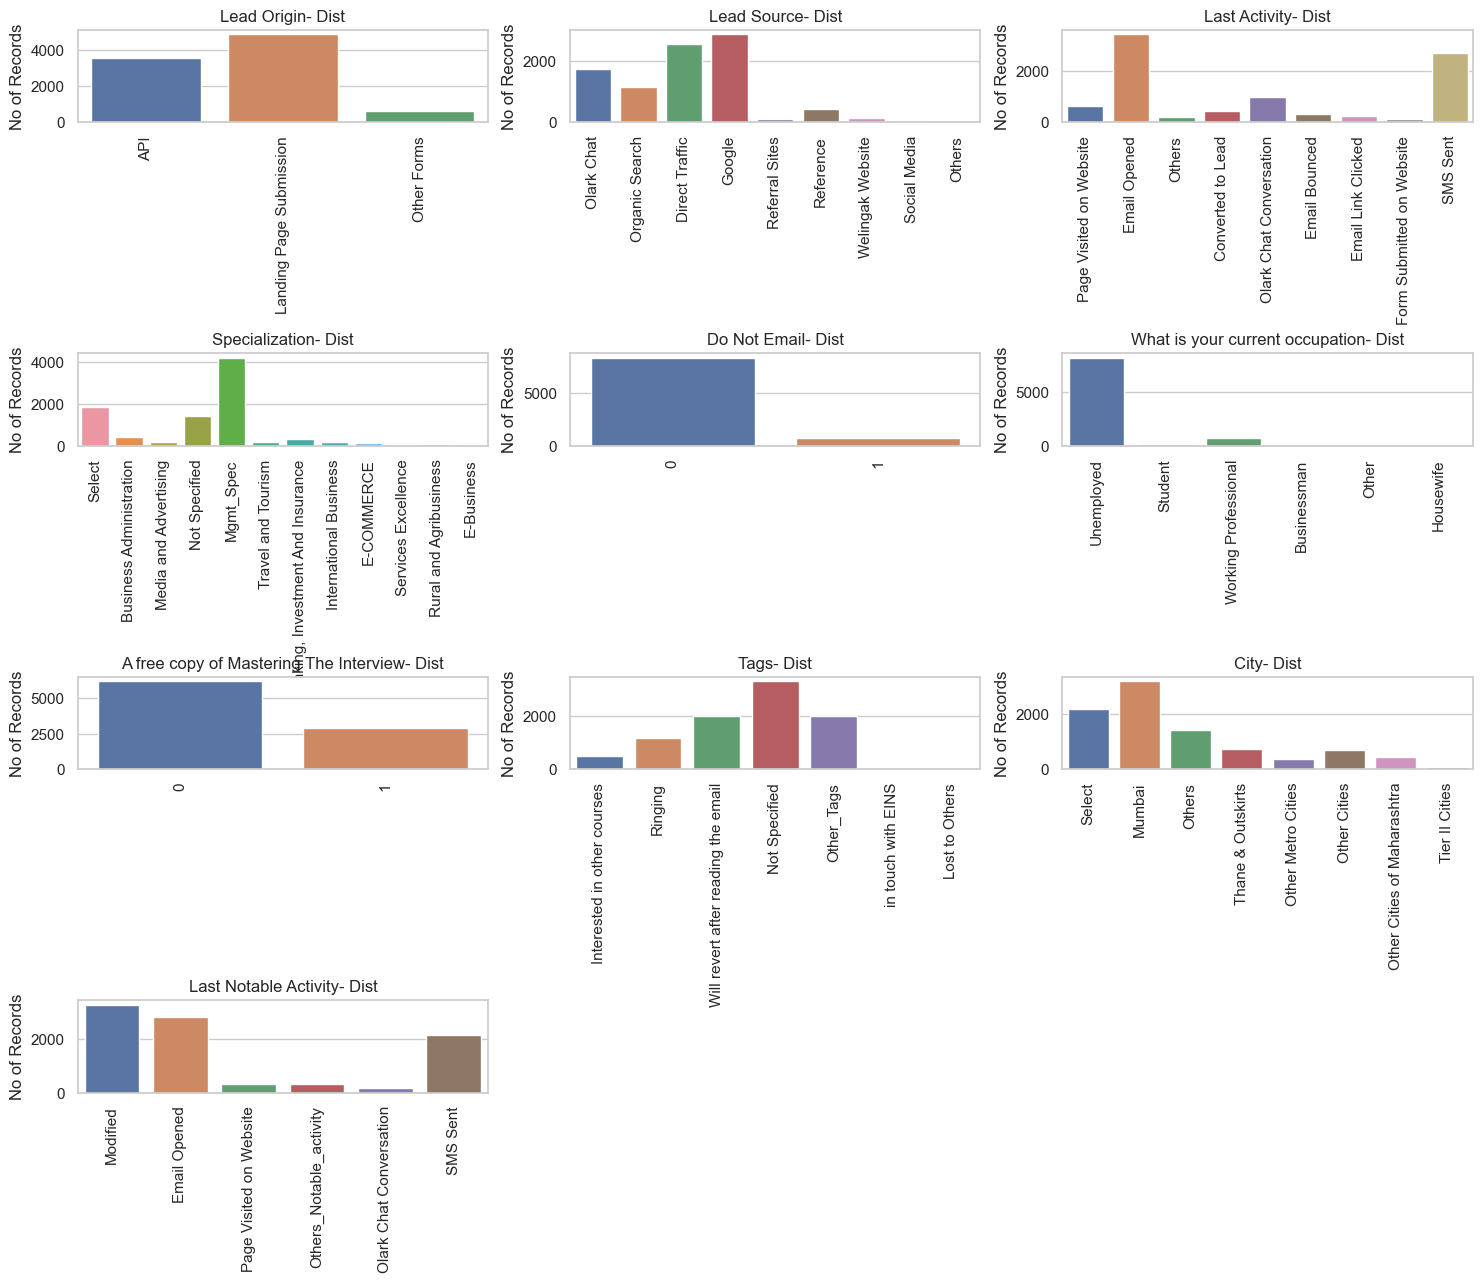

In [38]:
#Visualizing the distribution of the categorical variables

plt.figure(figsize=(18,18))
sns.set(style="whitegrid")
for i in range(len(col_list)):
    plt.subplot(5, 3,  i+1)
    cat=col_list[i]
    sns.countplot(x=cat, data=df_leads)
    plt.title(cat+'- Dist')
    plt.ylabel ('No of Records')
    plt.xticks(rotation=90)
    plt.xlabel(None)
    plt.subplots_adjust(hspace=2.5)

In [39]:
df_leads=df_leads[list(cat_cols|num_cols|target_col)]

In [40]:
# Numerical Variables null values fix (Need to try later)
df_leads.loc[df_leads['TotalVisits']==3]['Page Views Per Visit'].describe()

count    1306.000000
mean     2.631317   
std      0.663631   
min      1.000000   
25%      3.000000   
50%      3.000000   
75%      3.000000   
max      3.000000   
Name: Page Views Per Visit, dtype: float64

In [41]:
# Lets impute the Null Values of TotalVisits using median.
df_leads['TotalVisits'].fillna((df_leads['TotalVisits'].median()), inplace=True)

df_leads['Page Views Per Visit'].replace(np.nan, 2.65, inplace=True)

In [42]:
# To check the final null values in the dataset we will use for Model Building.
Null_cols=round(100*(df_leads.isnull().sum()/len(df_leads.index)),2)
print(Null_cols)

Specialization                            0.0
Lead Origin                               0.0
Lead Source                               0.0
Tags                                      0.0
TotalVisits                               0.0
Last Activity                             0.0
Converted                                 0.0
Do Not Email                              0.0
A free copy of Mastering The Interview    0.0
City                                      0.0
Page Views Per Visit                      0.0
Total Time Spent on Website               0.0
What is your current occupation           0.0
Last Notable Activity                     0.0
dtype: float64


### Bivariate Analysis

In [43]:
# Let plot the numerical variables to see the distribution of its data
num_cols1=['TotalVisits','Total Time Spent on Website','Page Views Per Visit']

In [44]:
def nums_col(target,cols):
    plt.figure(figsize=(4,4))
    ax=sns.boxplot(x=target, y=cols, data=df_leads)
    
    plt.show()

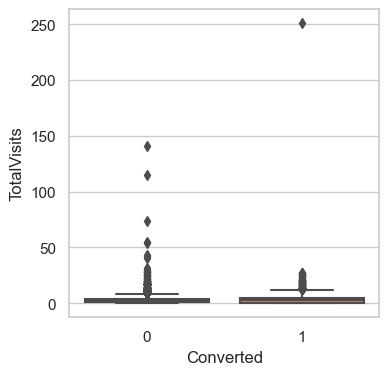

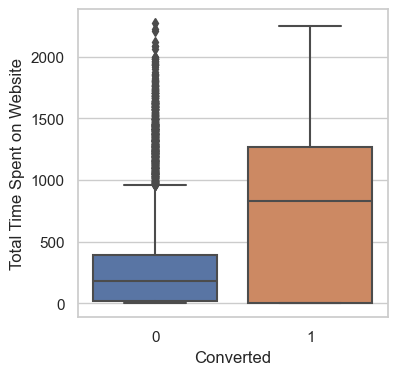

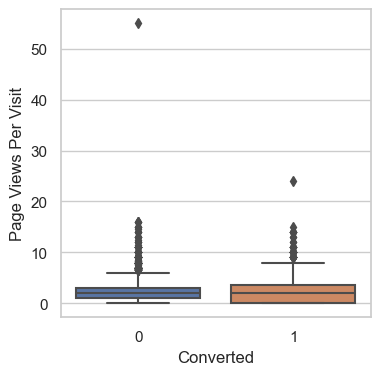

In [45]:
for c in num_cols1:
    nums_col('Converted',c)

#### Checking for Outliers

In [46]:
# Check for Outliers in the continuous variables
num_cols2=df_leads[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]
num_cols2.describe(percentiles = [0.25,0.5,0.75,0.85,0.95,0.99,1])

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9074.000000,9074.000000,9074.000000
mean,3.456028,482.887481,2.370151
std,4.858802,545.256560,2.160871
min,0.000000,0.000000,0.000000
25%,1.000000,11.000000,1.000000
50%,3.000000,246.000000,2.000000
75%,5.000000,922.750000,3.200000
85%,6.000000,1226.000000,4.000000
95%,10.000000,1557.000000,6.000000
99%,17.000000,1839.000000,9.000000


In [47]:
# Let fix the outliers from the data
qtl1=df_leads['TotalVisits'].quantile(0.00)
qtl4=df_leads['TotalVisits'].quantile(0.99)
df_leads['TotalVisits'][df_leads['TotalVisits']<= qtl1]=qtl1
df_leads['TotalVisits'][df_leads['TotalVisits']>= qtl4]=qtl4

qtl1=df_leads['Page Views Per Visit'].quantile(0.00)
qtl4=df_leads['Page Views Per Visit'].quantile(0.99)
df_leads['Page Views Per Visit'][df_leads['Page Views Per Visit']<= qtl1]=qtl1
df_leads['Page Views Per Visit'][df_leads['Page Views Per Visit']>= qtl4]=qtl4

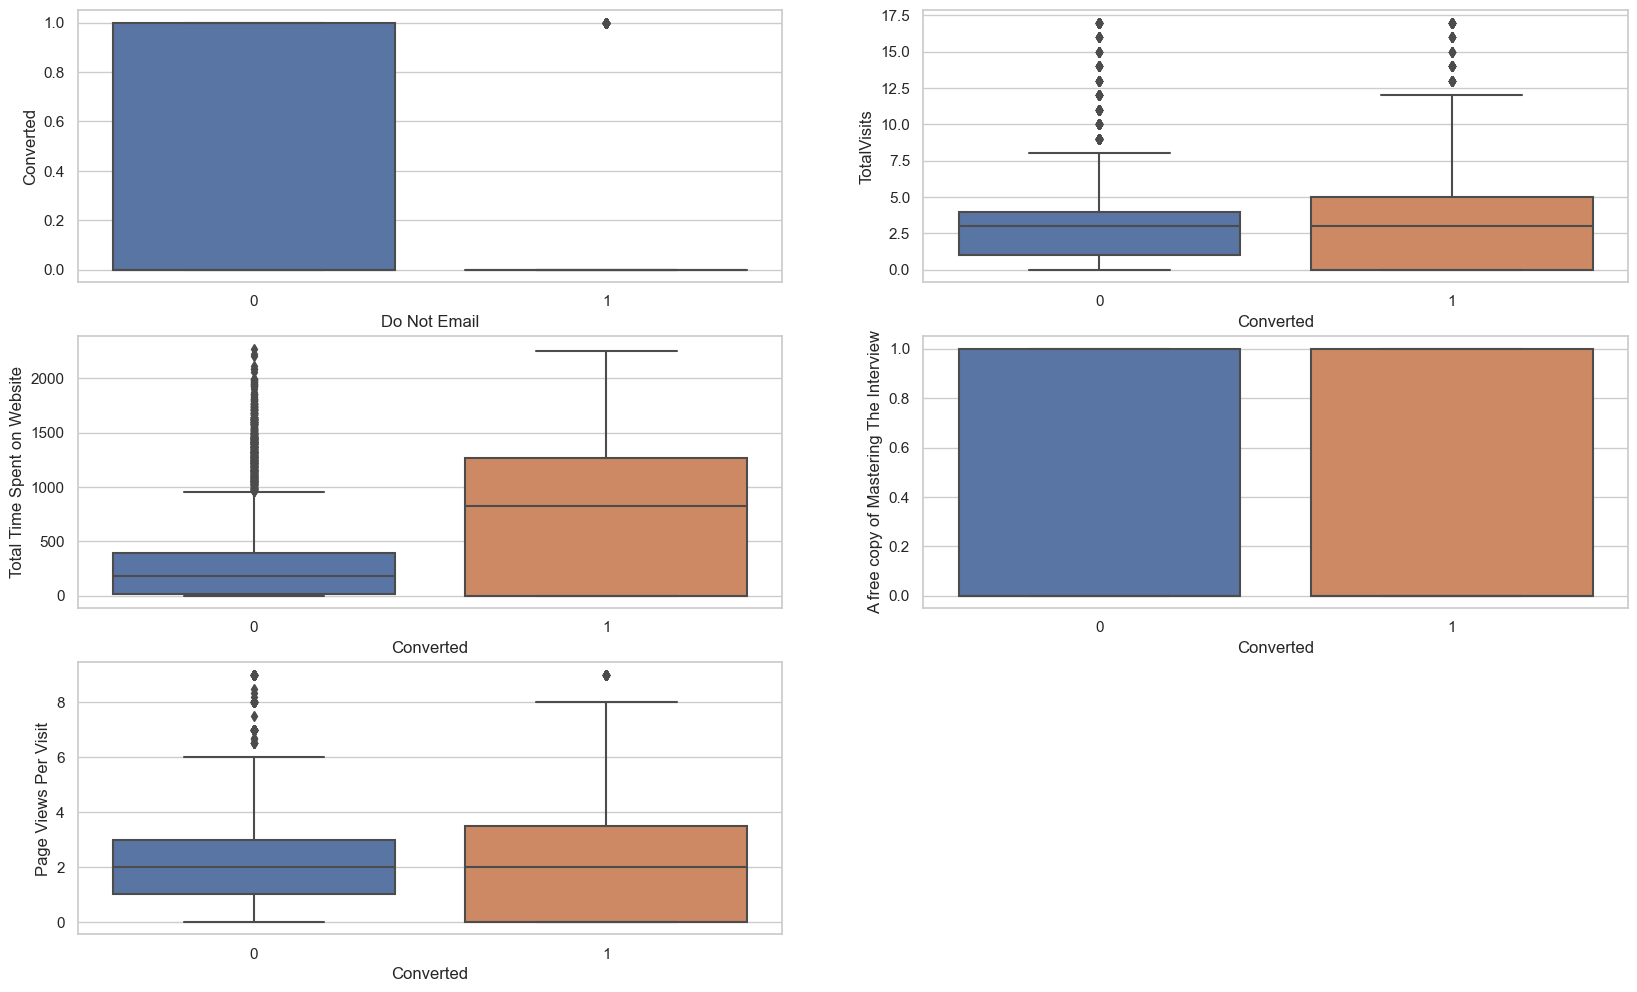

In [48]:
# Check post fixing the outliers:
plt.figure(figsize=(20,12))
plt.subplot(3,2,1)
sns.boxplot(x='Do Not Email', y='Converted', data=df_leads)
plt.subplot(3,2,2)
sns.boxplot(x='Converted', y='TotalVisits', data=df_leads)
plt.subplot(3,2,3)
sns.boxplot(x='Converted', y='Total Time Spent on Website', data=df_leads)
plt.subplot(3,2,4)
sns.boxplot(x='Converted', y='A free copy of Mastering The Interview', data=df_leads)
plt.subplot(3,2,5)
sns.boxplot(x='Converted', y='Page Views Per Visit', data=df_leads)
plt.show()

In [49]:
df_leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 14 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Specialization                          9074 non-null   object 
 1   Lead Origin                             9074 non-null   object 
 2   Lead Source                             9074 non-null   object 
 3   Tags                                    9074 non-null   object 
 4   TotalVisits                             9074 non-null   float64
 5   Last Activity                           9074 non-null   object 
 6   Converted                               9074 non-null   int64  
 7   Do Not Email                            9074 non-null   int64  
 8   A free copy of Mastering The Interview  9074 non-null   int64  
 9   City                                    9074 non-null   object 
 10  Page Views Per Visit                    9074 non-null   floa

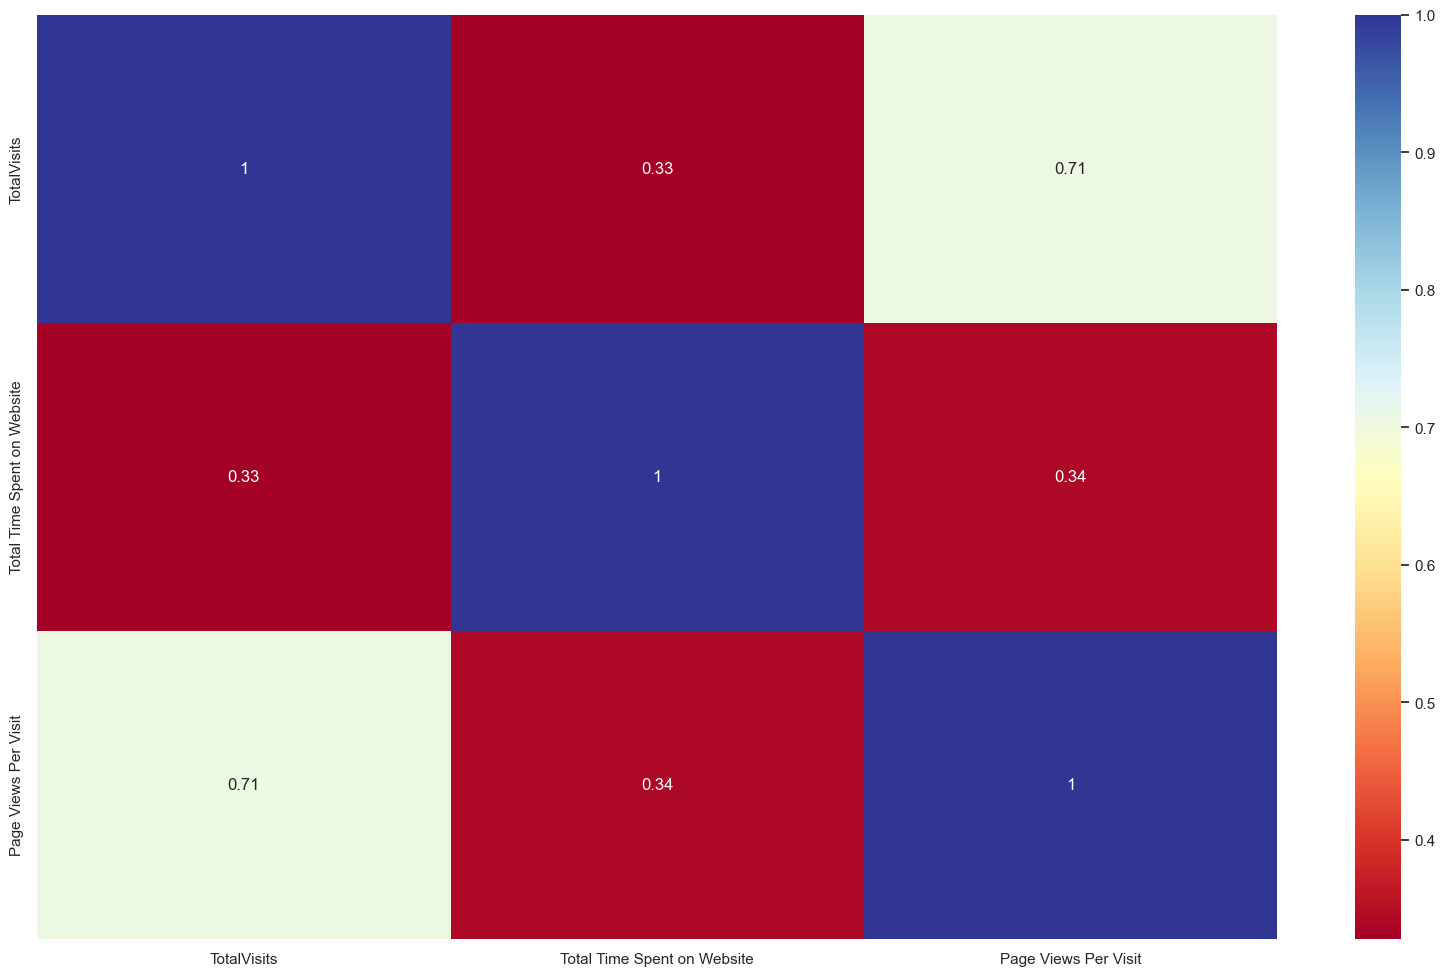

In [50]:
# Set the figure size
plt.figure(figsize=(20,12))

# Lets check the Heatmap
sns.heatmap(df_leads[num_cols1].corr(), cmap='RdYlBu', annot=True)
plt.show()

#### Total Visits and Page Views Per Visit are having high correlation of 0.71

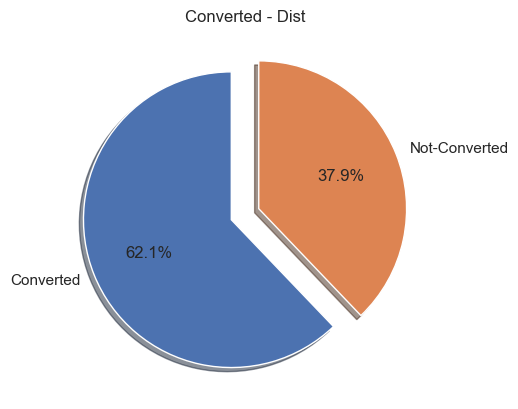

In [51]:
# Let see the distribution of the Target Variable
explode = (0.1, 0.1)
pie_labels=['Converted', 'Not-Converted']
pie_sizes=df_leads['Converted'].value_counts()/len(df_leads.index)*100
plt.pie(pie_sizes, labels=pie_labels, explode=explode, autopct='%1.1f%%', shadow=True, startangle=90)
plt.title('Converted - Dist')
plt.show()

In [52]:
df_leads['Converted'].value_counts()

0    5639
1    3435
Name: Converted, dtype: int64

In [53]:
df_leads.shape

(9074, 14)

In [54]:
round(100*df_leads.isnull().sum()/len(df_leads.index),2)

Specialization                            0.0
Lead Origin                               0.0
Lead Source                               0.0
Tags                                      0.0
TotalVisits                               0.0
Last Activity                             0.0
Converted                                 0.0
Do Not Email                              0.0
A free copy of Mastering The Interview    0.0
City                                      0.0
Page Views Per Visit                      0.0
Total Time Spent on Website               0.0
What is your current occupation           0.0
Last Notable Activity                     0.0
dtype: float64

In [55]:
# Check the data from top:
df_leads.head()

,Specialization,Lead Origin,Lead Source,Tags,TotalVisits,Last Activity,Converted,Do Not Email,A free copy of Mastering The Interview,City,Page Views Per Visit,Total Time Spent on Website,What is your current occupation,Last Notable Activity
0,Select,API,Olark Chat,Interested in other courses,0.0,Page Visited on Website,0,0,0,Select,0.0,0,Unemployed,Modified
1,Select,API,Organic Search,Ringing,5.0,Email Opened,0,0,0,Select,2.5,674,Unemployed,Email Opened
2,Business Administration,Landing Page Submission,Direct Traffic,Will revert after reading the email,2.0,Email Opened,1,0,1,Mumbai,2.0,1532,Student,Email Opened
3,Media and Advertising,Landing Page Submission,Direct Traffic,Ringing,1.0,Others,0,0,0,Mumbai,1.0,305,Unemployed,Modified
4,Select,Landing Page Submission,Google,Will revert after reading the email,2.0,Converted to Lead,1,0,0,Mumbai,1.0,1428,Unemployed,Modified


In [56]:
# Create dummy variables for the categorical variables and dropping the first one
dum1=pd.get_dummies(df_leads[['Lead Origin','Lead Source','Last Activity','Specialization',
                              'What is your current occupation','Tags','City','Last Notable Activity']], drop_first=True)

In [57]:
# To check the statistical distribution of the dummies created
dum1.describe()

,Lead Origin_Landing Page Submission,Lead Origin_Other Forms,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_International Business,Specialization_Media and Advertising,Specialization_Mgmt_Spec,Specialization_Not Specified,...,Specialization_Services Excellence,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Lost to Others,Tags_Not Specified,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email,Tags_in touch with EINS,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Others,City_Select,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others_Notable_activity,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
count,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,...,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000
mean,0.538351,0.067335,0.316619,0.193189,0.127177,0.002314,0.048821,0.013776,0.003637,0.014216,0.034384,0.029425,0.378223,0.012784,0.107119,0.021049,0.070531,0.299317,0.043972,0.006282,0.012233,0.019396,0.022261,0.462530,0.157703,...,0.004408,0.022261,0.000992,0.001653,0.022702,0.899162,0.074609,0.000771,0.366652,0.222173,0.130813,0.222173,0.001322,0.074939,0.049151,0.041547,0.156381,0.237602,0.082103,0.008155,0.360040,0.020168,0.036478,0.035045,0.237161
std,0.498554,0.250616,0.465183,0.394822,0.333189,0.048054,0.215505,0.116565,0.060199,0.118389,0.182223,0.169003,0.484971,0.112347,0.309282,0.143556,0.256054,0.457984,0.205044,0.079012,0.109929,0.137920,0.147541,0.498622,0.364483,...,0.066251,0.147541,0.031480,0.040627,0.148961,0.301130,0.262774,0.027766,0.481917,0.415730,0.337215,0.415730,0.036344,0.263308,0.216196,0.199563,0.363236,0.425637,0.274536,0.089942,0.480038,0.140581,0.187486,0.183904,0.425365
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000

In [58]:
# Adding the results to the master dataframe:
df_leads=pd.concat([df_leads, dum1], axis=1)

In [59]:
df_leads.head()

,Specialization,Lead Origin,Lead Source,Tags,TotalVisits,Last Activity,Converted,Do Not Email,A free copy of Mastering The Interview,City,Page Views Per Visit,Total Time Spent on Website,What is your current occupation,Last Notable Activity,Lead Origin_Landing Page Submission,Lead Origin_Other Forms,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Welingak Website,Last Activity_Email Bounced,...,Specialization_Services Excellence,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Lost to Others,Tags_Not Specified,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email,Tags_in touch with EINS,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Others,City_Select,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others_Notable_activity,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
0,Select,API,Olark Chat,Interested in other courses,0.0,Page Visited on Website,0,0,0,Select,0.0,0,Unemployed,Modified,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
1,Select,API,Organic Search,Ringing,5.0,Email Opened,0,0,0,Select,2.5,674,Unemployed,Email Opened,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,Business Administration,Landing Page Submission,Direct Traffic,Will revert after reading the email,2.0,Email Opened,1,0,1,Mumbai,2.0,1532,Student,Email Opened,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Media and Advertising,Landing Page Submission,Direct Traffic,Ringing,1.0,Others,0,0,0,Mumbai,1.0,305,Unemployed,Modified,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,Select,Landing Page Submission,Google,Will revert after reading the email,2.0,Converted to Lead,1,0,0,Mumbai,1.0,1428,Unemployed,Modified,1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0


In [60]:
print(df_leads.shape)
print(dum1.shape)

(9074, 66)
(9074, 52)


In [61]:
# Dropping original columns for which dummies are created
df_leads=df_leads.drop(['Lead Origin','Lead Source','Last Activity','Specialization','What is your current occupation',
                        'Tags','City','Last Notable Activity'],1)

### Step 4 Train Test Split and Scaling

In [62]:
# Split the data into train and test
# Let now add feature variable to X
X=df_leads.drop(['Converted'], axis=1)

# Let add response variable to y
y=df_leads['Converted']

#Splitting of data between train and test for Model building
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.70, random_state=100)

#To check the shape of train and test data
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(6351, 57)
(2723, 57)
(6351,)
(2723,)


### Step 5 Feature Scaling

In [63]:
# Scaling the numerical data to remove disparities in magnitude and scales of numerical variables
num_vars=X_train.select_dtypes(include = ['float64','int64']).columns

scaler=StandardScaler()
X_train[num_vars]=scaler.fit_transform(X_train[num_vars])
X_train.head()

,TotalVisits,Do Not Email,A free copy of Mastering The Interview,Page Views Per Visit,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Origin_Other Forms,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Specialization_Business Administration,Specialization_E-Business,...,Specialization_Services Excellence,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Lost to Others,Tags_Not Specified,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email,Tags_in touch with EINS,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Others,City_Select,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others_Notable_activity,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
3009,-0.417238,-0.292645,1.473344,-0.177298,-0.160255,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1012,-0.417238,3.417111,-0.678728,-0.177298,-0.540048,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
9226,-1.034493,-0.292645,-0.678728,-1.183128,-0.888650,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0
4750,-0.417238,-0.292645,-0.678728,-0.177298,1.643304,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
7987,0.508645,-0.292645,-0.678728,0.074159,2.017593,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0


In [64]:
y_train.head()

3009    0
1012    0
9226    0
4750    1
7987    1
Name: Converted, dtype: int64

In [65]:
# Conversion Rate
cov=(sum(df_leads['Converted'])/len(df_leads['Converted'].index))*100
cov

37.85541106458012

##### We have around 38% of Conversion rate

### Step 6 Looking at Correlations

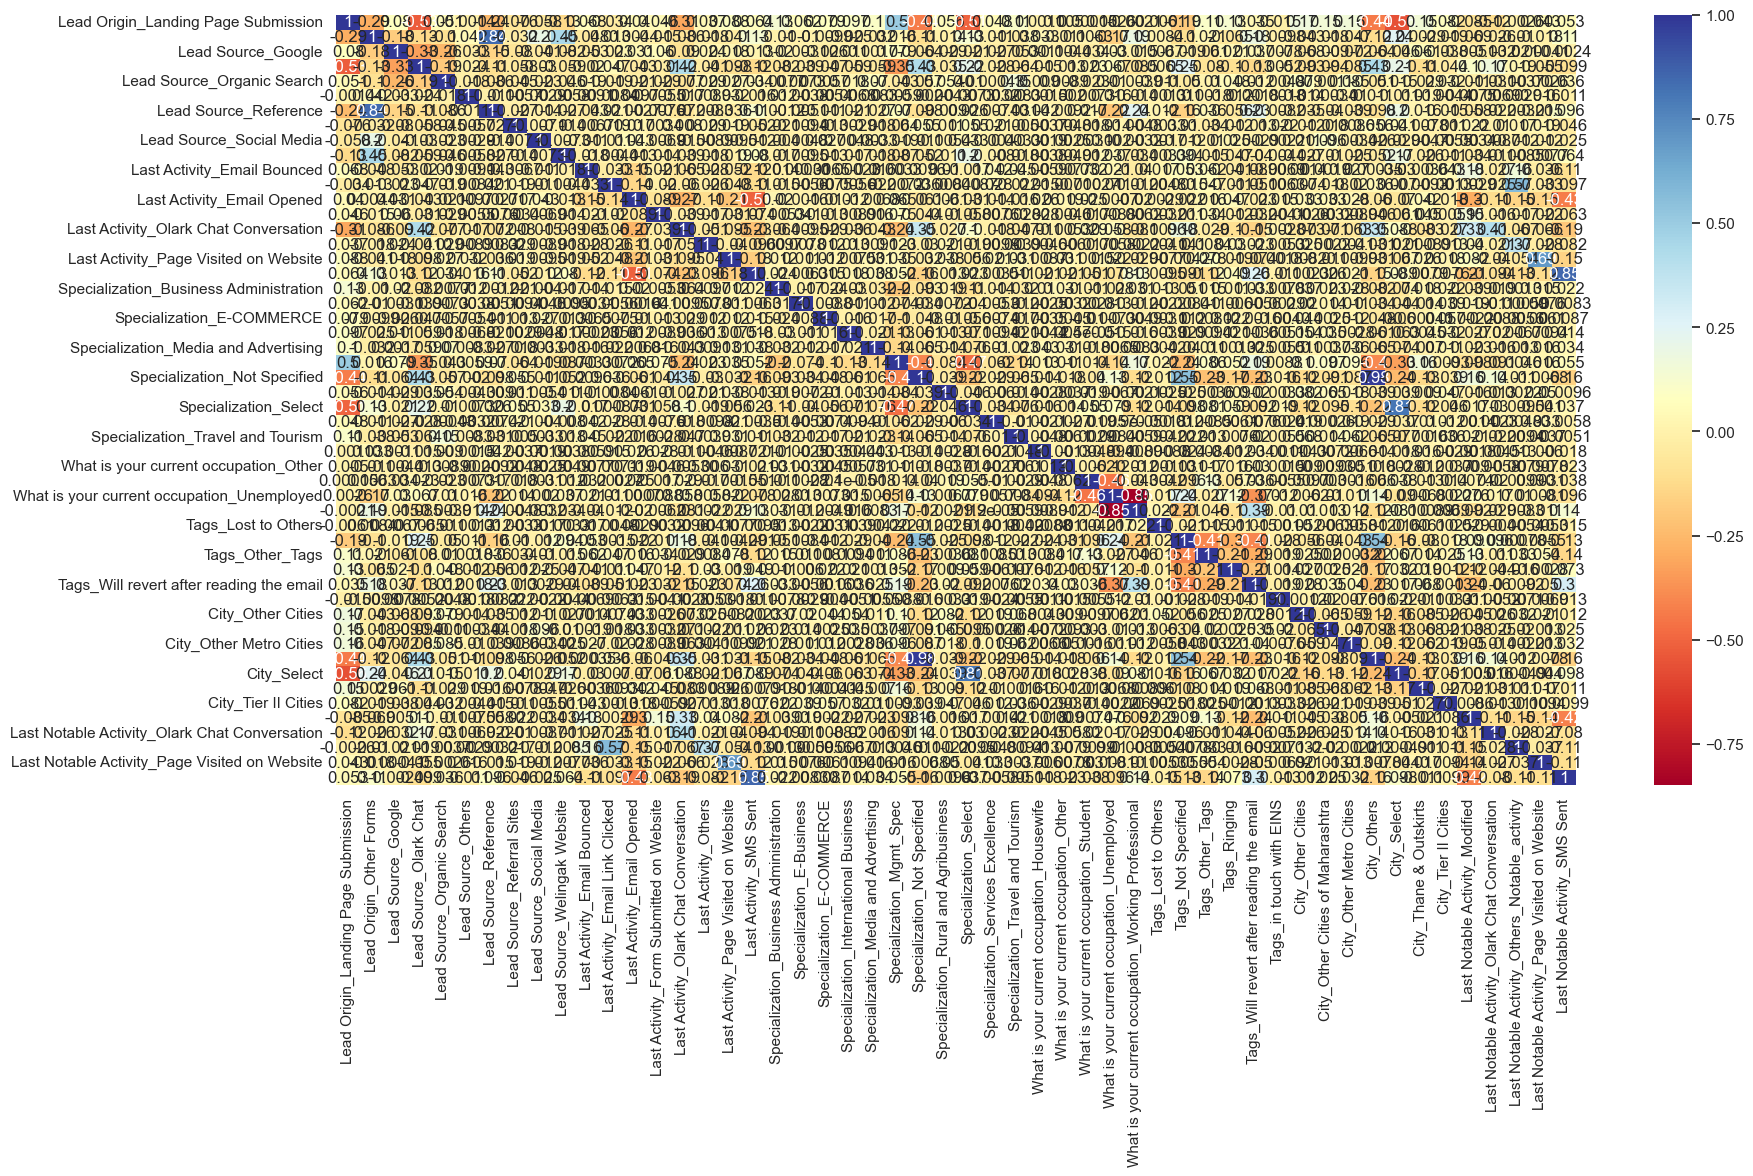

In [66]:
# Lets check the correlation of the dummy variables created
plt.figure(figsize=(20,10))

# Lets check the Heatmap
sns.heatmap(dum1.corr(), cmap='RdYlBu', annot=True)
plt.show()

In [67]:
# Correlation between different numerical variables for both the converted and not-converted cases
conv_corr = df_leads.corr()

#Unstacking the correlation matrix to find out top correlations
conv_corr_unstacked = conv_corr.unstack().sort_values(kind="quicksort")
conv_corr.where(np.triu(np.ones(conv_corr.shape), k=1).astype(np.bool)).stack().sort_values(ascending=False).head(10)

Specialization_Not Specified            City_Others                                      0.983363
Last Activity_SMS Sent                  Last Notable Activity_SMS Sent                   0.853102
Lead Origin_Other Forms                 Lead Source_Reference                            0.843166
Specialization_Select                   City_Select                                      0.811697
TotalVisits                             Page Views Per Visit                             0.705080
Last Activity_Page Visited on Website   Last Notable Activity_Page Visited on Website    0.691811
Converted                               Tags_Will revert after reading the email         0.652518
Do Not Email                            Last Activity_Email Bounced                      0.620041
Last Activity_Email Link Clicked        Last Notable Activity_Others_Notable_activity    0.567892
A free copy of Mastering The Interview  Lead Origin_Landing Page Submission              0.564863
dtype: float64

In [68]:
X_test=X_test.drop(['City_Others','Last Notable Activity_SMS Sent','Lead Source_Reference',
                    'City_Select','Last Activity_Email Bounced','Last Notable Activity_Others_Notable_activity'],1)

X_train=X_train.drop(['City_Others','Last Notable Activity_SMS Sent','Lead Source_Reference',
                    'City_Select','Last Activity_Email Bounced','Last Notable Activity_Others_Notable_activity'],1)

### Step 7 Model Building

In [69]:
#Logistic Regression Model
logm1 = sm.GLM(y_train, (sm.add_constant(X_train)), family=sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6299
Model Family:                Binomial   Df Model:                           51
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1546.3
Date:                Sun, 18 Feb 2024   Deviance:                       3092.5
Time:                        21:30:05   Pearson chi2:                 9.72e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.5709
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.7228      1.331     -1.294      0.196      -4.332       0.886
TotalVisits                                              0.3740      0.066      5.649      0.000       0.244       0.504
Do Not Email                                            -0.3943      0.069     -5.717      0.000      -0.529      -0.259
A free copy of Mastering The Interview                  -0.0756      0.067     -1.121      0.262      -0.208       0.057
Page Views Per Visit                                    -0.3323      0.078     -4.246      0.000      -0.486      -0.179
Total Time Spent on Website                              1.1574      0.055     21.126      0.000       1.050       1.265
Lead Origin_Landing Page Submission                     -0.7363      0.193     -3.822      0.000      -1.114      -0.359
Lead Origin_Other Forms                                  3.4275      0.352      9.732      0.000       2.737       4.118
Lead Source_Google                                       0.1558      0.152      1.028      0.304      -0.141       0.453
Lead Source_Olark Chat                                   1.2695      0.215      5.896      0.000       0.848       1.692
Lead Source_Organic Search                              -0.0116      0.180     -0.064      0.949      -0.364       0.341
Lead Source_Others                                      -0.1277      0.934     -0.137      0.891      -1.959       1.704
Lead Source_Referral Sites                              -0.0123      0.495     -0.025      0.980      -0.983       0.959
Lead Source_Social Media                                -2.5465      0.766     -3.323      0.001      -4.048      -1.045
Lead Source_Welingak Website                             1.8263      0.788      2.318      0.020       0.282       3.370
Last Activity_Email Link Clicked                         0.4802      0.368      1.304      0.192      -0.241       1.202
Last Activity_Email Opened                               0.7108      0.282      2.518      0.012       0.158       1.264
Last Activity_Form Submitted on Website                  0.3327      0.493      0.675      0.500      -0.633       1.299
Last Activity_Olark Chat Conversation                   -0.3090      0.342     -0.904      0.366      -0.979       0.361
Last Activity_Others                                     1.3816      0.410      3.373      0.001       0.579       2.185
Last Activity_Page Visited on Website                    0.5039      0.366      1.375      0.169      -0.214       1.222
Last Activity_SMS Sent                                   2.2046      0.278      7.916      0.000       1.659       2.750
Specialization_Business Administration                  -0

In [70]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [71]:
from sklearn.feature_selection import RFE  
rfe = RFE(logreg, n_features_to_select=15)
rfe = rfe.fit(X_train,y_train)

In [72]:
rfe.support_

array([False, False, False, False,  True,  True,  True, False,  True,
       False, False, False,  True,  True, False, False, False,  True,
       False, False,  True, False, False, False, False, False, False,
        True, False, False, False, False,  True, False, False, False,
        True, False,  True,  True,  True,  True, False, False, False,
       False, False, False, False, False, False])

In [73]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 17),
 ('Do Not Email', False, 13),
 ('A free copy of Mastering The Interview', False, 33),
 ('Page Views Per Visit', False, 18),
 ('Total Time Spent on Website', True, 1),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Other Forms', True, 1),
 ('Lead Source_Google', False, 22),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 35),
 ('Lead Source_Others', False, 34),
 ('Lead Source_Referral Sites', False, 31),
 ('Lead Source_Social Media', True, 1),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Email Link Clicked', False, 23),
 ('Last Activity_Email Opened', False, 16),
 ('Last Activity_Form Submitted on Website', False, 26),
 ('Last Activity_Olark Chat Conversation', True, 1),
 ('Last Activity_Others', False, 11),
 ('Last Activity_Page Visited on Website', False, 24),
 ('Last Activity_SMS Sent', True, 1),
 ('Specialization_Business Administration', False, 25),
 ('Specialization_E-Business', False, 20)

In [74]:
col = X_train.columns[rfe.support_]
col

Index(['Total Time Spent on Website', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Other Forms', 'Lead Source_Olark Chat',
       'Lead Source_Social Media', 'Lead Source_Welingak Website',
       'Last Activity_Olark Chat Conversation', 'Last Activity_SMS Sent',
       'Specialization_Not Specified',
       'What is your current occupation_Housewife',
       'What is your current occupation_Working Professional',
       'Tags_Not Specified', 'Tags_Other_Tags', 'Tags_Ringing',
       'Tags_Will revert after reading the email'],
      dtype='object')

In [75]:
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Do Not Email', 'A free copy of Mastering The Interview',
       'Page Views Per Visit', 'Lead Source_Google',
       'Lead Source_Organic Search', 'Lead Source_Others',
       'Lead Source_Referral Sites', 'Last Activity_Email Link Clicked',
       'Last Activity_Email Opened', 'Last Activity_Form Submitted on Website',
       'Last Activity_Others', 'Last Activity_Page Visited on Website',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_International Business',
       'Specialization_Media and Advertising', 'Specialization_Mgmt_Spec',
       'Specialization_Rural and Agribusiness', 'Specialization_Select',
       'Specialization_Services Excellence',
       'Specialization_Travel and Tourism',
       'What is your current occupation_Other',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed', 'Tags_Lost to Others',
       'Tags_in t

In [76]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1659.0
Date:                Sun, 18 Feb 2024   Deviance:                       3318.0
Time:                        21:30:11   Pearson chi2:                 9.96e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.5554
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -3.6846      0.331    -11.138      0.000      -4.333      -3.036
Total Time Spent on Website                              1.1452      0.052     22.152      0.000       1.044       1.247
Lead Origin_Landing Page Submission                     -1.1764      0.124     -9.452      0.000      -1.420      -0.932
Lead Origin_Other Forms                                  3.1275      0.296     10.562      0.000       2.547       3.708
Lead Source_Olark Chat                                   1.1973      0.154      7.790      0.000       0.896       1.499
Lead Source_Social Media                                -2.4398      0.758     -3.221      0.001      -3.925      -0.955
Lead Source_Welingak Website                             1.9356      0.773      2.504      0.012       0.420       3.451
Last Activity_Olark Chat Conversation                   -1.3303      0.201     -6.625      0.000      -1.724      -0.937
Last Activity_SMS Sent                                   1.5060      0.100     15.066      0.000       1.310       1.702
Specialization_Not Specified                            -1.5800      0.153    -10.301      0.000      -1.881      -1.279
What is your current occupation_Housewife               21.5862   1.37e+04      0.002      0.999   -2.68e+04    2.69e+04
What is your current occupation_Working Professional     1.6691      0.283      5.889      0.000       1.114       2.225
Tags_Not Specified                                       2.8262      0.333      8.491      0.000       2.174       3.479
Tags_Other_Tags                                          2.6786      0.331      8.094      0.000       2.030       3.327
Tags_Ringing                                            -0.8538      0.405     -2.111      0.035      -1.647      -0.061
Tags_Will revert after reading the email                 6.9772      0.374     18.637      0.000       6.243       7.711
========================================================================================================================
"""

In [77]:
# Check the predicted values on train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

3009    0.098113
1012    0.071476
9226    0.054538
4750    0.794643
7987    0.836747
1281    0.990734
2880    0.045471
4971    0.935854
7536    0.994804
1248    0.110962
dtype: float64

In [78]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.09811276, 0.07147579, 0.05453775, 0.79464324, 0.83674727,
       0.9907344 , 0.04547059, 0.93585404, 0.99480443, 0.11096218])

#### Creating a data frame with actual convert flag and the predicted probabilities

In [79]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'convert_prob': y_train_pred})
y_train_pred_final['CustID']=y_train.index

y_train_pred_final.head()

,Converted,convert_prob,CustID
0,0,0.098113,3009
1,0,0.071476,1012
2,0,0.054538,9226
3,1,0.794643,4750
4,1,0.836747,7987


##### Creating new columns 'predicted' with 1 if Converted _Prob >0.5 else 0

In [80]:
y_train_pred_final['predicted']=y_train_pred_final.convert_prob.map(lambda x:1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,convert_prob,CustID,predicted
0,0,0.098113,3009,0
1,0,0.071476,1012,0
2,0,0.054538,9226,0
3,1,0.794643,4750,1
4,1,0.836747,7987,1


In [81]:
from sklearn import metrics
# Confusion Matrics
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted)
print(confusion)

[[3688  217]
 [ 470 1976]]


In [82]:
#  Predicted   Not-Converted   Converted
#   Actual

# Not Converted     3688          217
#  Converted        470          1976

In [83]:
# Accuracy
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.891828058573453


#### Checking VIF

In [84]:
# Check for the VIF variables
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [85]:
vif = pd.DataFrame()
vif['features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,features,VIF
1,Lead Origin_Landing Page Submission,3.65
11,Tags_Not Specified,3.58
14,Tags_Will revert after reading the email,2.65
3,Lead Source_Olark Chat,2.27
8,Specialization_Not Specified,2.25
2,Lead Origin_Other Forms,2.05
12,Tags_Other_Tags,1.98
7,Last Activity_SMS Sent,1.67
13,Tags_Ringing,1.62
6,Last Activity_Olark Chat Conversation,1.44


In [86]:
# Since the p-value for this feature is high we would drop this variable
col = col.drop('What is your current occupation_Housewife',1)
col

Index(['Total Time Spent on Website', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Other Forms', 'Lead Source_Olark Chat',
       'Lead Source_Social Media', 'Lead Source_Welingak Website',
       'Last Activity_Olark Chat Conversation', 'Last Activity_SMS Sent',
       'Specialization_Not Specified',
       'What is your current occupation_Working Professional',
       'Tags_Not Specified', 'Tags_Other_Tags', 'Tags_Ringing',
       'Tags_Will revert after reading the email'],
      dtype='object')

In [87]:
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1661.2
Date:                Sun, 18 Feb 2024   Deviance:                       3322.3
Time:                        21:30:13   Pearson chi2:                 9.99e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.5551
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -3.6841      0.331    -11.138      0.000      -4.332      -3.036
Total Time Spent on Website                              1.1450      0.052     22.160      0.000       1.044       1.246
Lead Origin_Landing Page Submission                     -1.1725      0.124     -9.426      0.000      -1.416      -0.929
Lead Origin_Other Forms                                  3.1424      0.295     10.638      0.000       2.563       3.721
Lead Source_Olark Chat                                   1.1971      0.154      7.790      0.000       0.896       1.498
Lead Source_Social Media                                -2.4531      0.757     -3.239      0.001      -3.937      -0.969
Lead Source_Welingak Website                             1.9212      0.773      2.486      0.013       0.407       3.436
Last Activity_Olark Chat Conversation                   -1.3327      0.201     -6.635      0.000      -1.726      -0.939
Last Activity_SMS Sent                                   1.5024      0.100     15.036      0.000       1.307       1.698
Specialization_Not Specified                            -1.5775      0.153    -10.288      0.000      -1.878      -1.277
What is your current occupation_Working Professional     1.6618      0.284      5.862      0.000       1.106       2.217
Tags_Not Specified                                       2.8246      0.333      8.488      0.000       2.172       3.477
Tags_Other_Tags                                          2.6818      0.331      8.105      0.000       2.033       3.330
Tags_Ringing                                            -0.8556      0.405     -2.115      0.034      -1.648      -0.063
Tags_Will revert after reading the email                 6.9834      0.374     18.655      0.000       6.250       7.717
========================================================================================================================
"""

In [88]:
# Check the predicted values on train set
y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred[:10]

array([0.09837118, 0.07136161, 0.05428722, 0.79444541, 0.83722168,
       0.99079606, 0.04560561, 0.93583297, 0.99485542, 0.11081453])

In [89]:
y_train_pred_final['conver_prob'] = y_train_pred

In [90]:
y_train_pred_final['predicted']=y_train_pred_final.convert_prob.map(lambda x:1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,convert_prob,CustID,predicted,conver_prob
0,0,0.098113,3009,0,0.098371
1,0,0.071476,1012,0,0.071362
2,0,0.054538,9226,0,0.054287
3,1,0.794643,4750,1,0.794445
4,1,0.836747,7987,1,0.837222


In [91]:
# Accuracy
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.891828058573453


In [92]:
vif = pd.DataFrame()
vif['features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,features,VIF
1,Lead Origin_Landing Page Submission,3.65
10,Tags_Not Specified,3.58
13,Tags_Will revert after reading the email,2.65
3,Lead Source_Olark Chat,2.27
8,Specialization_Not Specified,2.25
2,Lead Origin_Other Forms,2.05
11,Tags_Other_Tags,1.98
7,Last Activity_SMS Sent,1.67
12,Tags_Ringing,1.62
6,Last Activity_Olark Chat Conversation,1.44


In [93]:
TP = confusion [1 , 1]  # True Positive
TN = confusion [0 , 0]  # True Negative
FP = confusion [0 , 1]  # False Positive
FN = confusion [1 , 0]  # False Negative

In [94]:
# Check the sensitivity for our Logistic Model
TP/float(TP+FN)

0.8078495502861816

In [95]:
# Check Specificity
TN/float(TN+FP)

0.9444302176696543

In [96]:
# Predicting conversion when customer does not really convert
print(FP/float(TN+FP))

0.05556978233034571


In [97]:
# Positive Predictive values
print (TP/float(TP+FP))

0.9010487916096671


In [98]:
# Negative Predictive values
print (TN/float(TN+FN))

0.886964886964887


### Plotting ROC Curve

In [99]:
def draw_roc(actuals, probs):
    fpr, tpr, thresholds = metrics.roc_curve(actuals, probs, drop_intermediate = False)
    auc_score = metrics.roc_auc_score(actuals, probs)
    plt.figure(figsize = (5,5))
    plt.plot(fpr, tpr, label='ROC curve (area= %0.2f)' % auc_score)
    plt.plot([0 , 1], [0, 1],  'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('FPR or [1 - TNR]')
    plt.ylabel('TPR')
    plt.title('Receiver Operating Characteristic Example')
    plt.legend(loc= 'lower right')
    plt.show()
    
    return None

In [100]:
fpr, tpr, threshold = metrics.roc_curve(y_train_pred_final.Converted, y_train_pred_final.convert_prob, drop_intermediate = False)

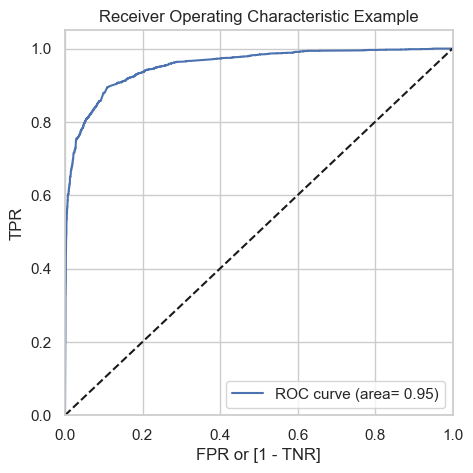

In [101]:
draw_roc(y_train_pred_final.Converted,  y_train_pred_final.convert_prob)

#### The ROC curve should be avalue close to 1. We are getting a good value of 0.95 indicating a good predictive model

#### Finding Optimal Cut Off Point

In [102]:
# Lets create columns with different probability cutoffs
numbers =[float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i] = y_train_pred_final.convert_prob.map(lambda x : 1 if x > i else 0)
y_train_pred_final.head()    

,Converted,convert_prob,CustID,predicted,conver_prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.098113,3009,0,0.098371,1,0,0,0,0,0,0,0,0,0
1,0,0.071476,1012,0,0.071362,1,0,0,0,0,0,0,0,0,0
2,0,0.054538,9226,0,0.054287,1,0,0,0,0,0,0,0,0,0
3,1,0.794643,4750,1,0.794445,1,1,1,1,1,1,1,1,0,0
4,1,0.836747,7987,1,0.837222,1,1,1,1,1,1,1,1,1,0


In [103]:
# Lets calculate accuracy sensitivity and specificity for various probability cutoffs.

cutoff_df=pd.DataFrame(columns=['prob','accuracy','sensi','speci'])

from sklearn.metrics import confusion_matrix

# TP = confusion [1 , 1]  # True Positive
# TN = confusion [0 , 0]  # True Negative
# FP = confusion [0 , 1]  # False Positive
# FN = confusion [1 , 0]  # False Negative

num = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i])
    total1 = sum(sum(cm1))
    accuracy = (cm1[0, 0] +cm1[1, 1])/total1
    
    speci = cm1[0, 0] /(cm1[0, 0] + cm1[0, 1])
    sensi = cm1[1, 1] /(cm1[1, 0] + cm1[1, 1])
    cutoff_df.loc[i] = (i, accuracy, sensi, speci)
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0  0.0   0.385136  1.000000  0.000000
0.1  0.1   0.792159  0.966067  0.683227
0.2  0.2   0.852464  0.936222  0.800000
0.3  0.3   0.881279  0.903516  0.867350
0.4  0.4   0.890726  0.839330  0.922919
0.5  0.5   0.891828  0.807850  0.944430
0.6  0.6   0.888679  0.776778  0.958771
0.7  0.7   0.878759  0.728128  0.973111
0.8  0.8   0.863644  0.672118  0.983611
0.9  0.9   0.845379  0.614064  0.990269


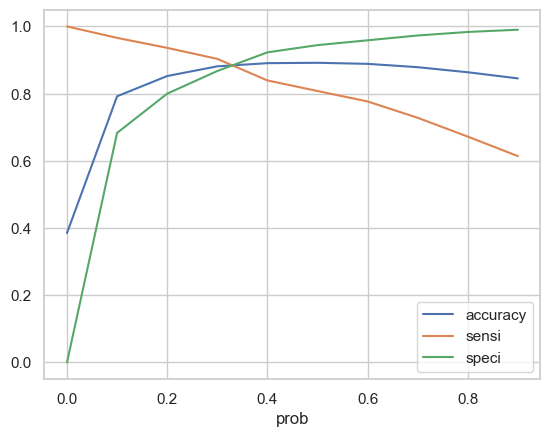

In [104]:
# Plot accuracy sensitivity and specificity for various probabilities

cutoff_df.plot.line(x = 'prob' , y = ['accuracy', 'sensi', 'speci'])
plt.show()

In [105]:
# From the above curve, 0.3 is the optimum point to take it as a cutoff probability.
y_train_pred_final['final_Predicted'] = y_train_pred_final.convert_prob.map(lambda x : 1 if x > 0.3 else 0)

y_train_pred_final.head()

,Converted,convert_prob,CustID,predicted,conver_prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_Predicted
0,0,0.098113,3009,0,0.098371,1,0,0,0,0,0,0,0,0,0,0
1,0,0.071476,1012,0,0.071362,1,0,0,0,0,0,0,0,0,0,0
2,0,0.054538,9226,0,0.054287,1,0,0,0,0,0,0,0,0,0,0
3,1,0.794643,4750,1,0.794445,1,1,1,1,1,1,1,1,0,0,1
4,1,0.836747,7987,1,0.837222,1,1,1,1,1,1,1,1,1,0,1


In [106]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.convert_prob.map(lambda x : round(x*100))
                                                                       
y_train_pred_final[['Converted', 'convert_prob', 'final_Predicted', 'Lead_Score']].head()

,Converted,convert_prob,final_Predicted,Lead_Score
0,0,0.098113,0,10
1,0,0.071476,0,7
2,0,0.054538,0,5
3,1,0.794643,1,79
4,1,0.836747,1,84


In [107]:
# Check Overall Accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)

0.8812785388127854

In [108]:
# Confusion Martix to find out the (TP, TN FP & FN) numbers
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)
confusion2

array([[3387,  518],
       [ 236, 2210]], dtype=int64)

In [109]:
TP = confusion2 [1 , 1]  # True Positive
TN = confusion2 [0 , 0]  # True Negative
FP = confusion2 [0 , 1]  # False Positive
FN = confusion2 [1 , 0]  # False Negative

In [110]:
# Check the sensitivity for our Logistic Model
TP/float(TP+FN)

0.9035159443990188

In [111]:
# Check Specificity
TN/float(TN+FP)

0.8673495518565941

In [112]:
# Predicting conversion when customer does not really convert
print(FP/float(TN+FP))

0.1326504481434059


In [113]:
# Positive Predictive values
print (TP/float(TP+FP))

0.8101173020527859


In [114]:
# Negative Predictive values
print (TN/float(TN+FN))

0.934860612751863


#### Observations:
 The above Model seems to be performing well. The ROC curve has a value of 0.95 which is very good. We have following values
    for the Train Data
    
    . Accuracy    : 88.13%
    
    . Sensitivity : 90.35%
        
    . Specificity : 86.73%

In [115]:
# Precision

TP/ TP + FP
confusion2[1,1]/(confusion2[0,1] + confusion2[1,1])

0.8101173020527859

In [116]:
# Recall
TP/TP + FN

confusion2[1,1]/(confusion2[1,0] + confusion2[1,1])

0.9035159443990188

In [117]:
from sklearn.metrics import precision_score, recall_score

In [118]:
precision_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)

0.8101173020527859

In [119]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)

0.9035159443990188

In [120]:
from sklearn.metrics import precision_recall_curve

In [121]:
y_train_pred_final.Converted, y_train_pred_final.final_Predicted
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.convert_prob)

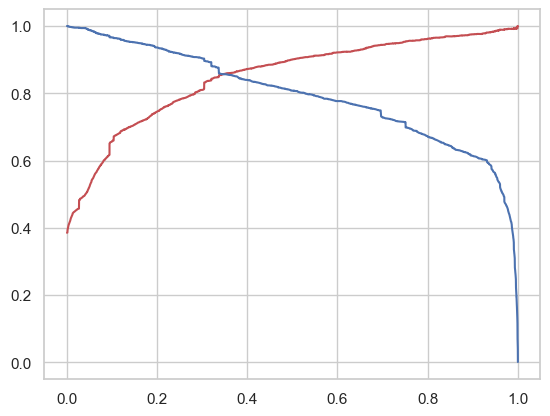

In [122]:
plt.plot(thresholds, p[:-1], "r-")
plt.plot(thresholds, r[:-1], "b-")
plt.show()

In [123]:
# Scaling Test Set

num_cols = X_test.select_dtypes(include=['int64']).columns
X_test[num_cols] = scaler.fit_transform(X_test[num_cols])

X_test.head()

,TotalVisits,Do Not Email,A free copy of Mastering The Interview,Page Views Per Visit,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Origin_Other Forms,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Welingak Website,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_International Business,...,Specialization_Mgmt_Spec,Specialization_Not Specified,Specialization_Rural and Agribusiness,Specialization_Select,Specialization_Services Excellence,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Lost to Others,Tags_Not Specified,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email,Tags_in touch with EINS,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website
3271,4.0,-0.292789,-0.693903,4.0,-0.591008,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1490,5.0,-0.292789,1.441123,5.0,1.894051,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
7936,2.0,-0.292789,-0.693903,2.0,-0.743117,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4216,0.0,-0.292789,-0.693903,0.0,-0.878732,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
3830,8.0,-0.292789,1.441123,8.0,-0.578179,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0


In [124]:
X_test = X_test[col]
X_test.head()

,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Origin_Other Forms,Lead Source_Olark Chat,Lead Source_Social Media,Lead Source_Welingak Website,Last Activity_Olark Chat Conversation,Last Activity_SMS Sent,Specialization_Not Specified,What is your current occupation_Working Professional,Tags_Not Specified,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email
3271,-0.591008,0,0,0,0,0,0,0,1,0,1,0,0,0
1490,1.894051,1,0,0,0,0,0,0,0,1,0,0,0,1
7936,-0.743117,0,0,0,0,0,0,0,1,0,1,0,0,0
4216,-0.878732,0,1,0,0,0,0,0,0,0,0,1,0,0
3830,-0.578179,1,0,0,0,0,0,0,0,0,1,0,0,0


In [125]:
X_test_sm = sm.add_constant(X_test)

In [126]:
y_test_pred = res.predict(X_test_sm)
y_test_pred[:10]

3271    0.042548
1490    0.997420
7936    0.035992
4216    0.756578
3830    0.063330
1800    0.949886
6507    0.007067
4821    0.148070
4223    0.999031
4714    0.322216
dtype: float64

In [127]:
y_test_pred[:10]

3271    0.042548
1490    0.997420
7936    0.035992
4216    0.756578
3830    0.063330
1800    0.949886
6507    0.007067
4821    0.148070
4223    0.999031
4714    0.322216
dtype: float64

In [128]:
y_pred_1 = pd.DataFrame(y_test_pred)


In [129]:
y_pred_1.head()

,0
3271,0.042548
1490,0.997420
7936,0.035992
4216,0.756578
3830,0.063330


In [130]:
y_test_df = pd.DataFrame(y_test)

In [131]:
y_test_df['CustID'] = y_test_df.index

In [132]:
# Removing index from both dataframes to append them side by side
y_pred_1.reset_index(drop = True, inplace = True)
y_test_df.reset_index(drop = True, inplace = True)

In [133]:
y_pred_final = pd.concat([y_test_df, y_pred_1], axis = 1)

In [134]:
y_pred_final.head()

,Converted,CustID,0
0,0,3271,0.042548
1,1,1490,0.997420
2,0,7936,0.035992
3,1,4216,0.756578
4,0,3830,0.063330


In [135]:
# Renaming the columns
y_pred_final = y_pred_final.rename(columns = {0 : 'Converted_prob'})

In [136]:
y_pred_final.head()

,Converted,CustID,Converted_prob
0,0,3271,0.042548
1,1,1490,0.997420
2,0,7936,0.035992
3,1,4216,0.756578
4,0,3830,0.063330


In [137]:
#Re arranging the columns
y_pred_final = y_pred_final [['CustID', 'Converted', 'Converted_prob']]

y_pred_final['Lead_score'] = y_pred_final.Converted_prob.map(lambda x : round(x*100))

In [138]:
y_pred_final.head()

,CustID,Converted,Converted_prob,Lead_score
0,3271,0,0.042548,4
1,1490,1,0.997420,100
2,7936,0,0.035992,4
3,4216,1,0.756578,76
4,3830,0,0.063330,6


In [139]:
y_pred_final['final_Predicted'] = y_pred_final.Converted_prob.map(lambda x :1 if x > 0.3 else 0)

In [140]:
y_pred_final.head()

,CustID,Converted,Converted_prob,Lead_score,final_Predicted
0,3271,0,0.042548,4,0
1,1490,1,0.997420,100,1
2,7936,0,0.035992,4,0
3,4216,1,0.756578,76,1
4,3830,0,0.063330,6,0


In [141]:
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.8663239074550129

In [142]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_Predicted)
confusion2

array([[1480,  254],
       [ 110,  879]], dtype=int64)

In [143]:
TP = confusion2 [1 , 1]  # True Positive
TN = confusion2 [0 , 0]  # True Negative
FP = confusion2 [0 , 1]  # False Positive
FN = confusion2 [1 , 0]  # False Negative

In [144]:
# Check the sensitivity for our Logistic Model
TP/float(TP+FN)

0.8887765419615774

In [145]:
# Check Specificity
TN/float(TN+FP)

0.8535178777393311

In [146]:
# Precision

TP/ TP + FP
confusion2[1,1]/(confusion2[0,1] + confusion2[1,1])

0.7758164165931156

In [147]:
# Recall
TP/TP + FN

confusion2[1,1]/(confusion2[1,0] + confusion2[1,1])

0.8887765419615774

#### Observations:
 The accuracy, sensitivity and specificity obtained by running the model on test data. 
    
    . Accuracy    : 86.63%
    
    . Sensitivity : 88.89%
        
    . Specificity : 85.35%

##### Lets compare the percentages of train and test both
 
           Train Data                                        Test Data 
    
    . Accuracy    : 88.13%                             . Accuracy    : 86.63%
    
    . Sensitivity : 90.35%                             . Sensitivity : 88.89%
        
    . Specificity : 86.73%                             . Specificity : 85.35% 

                                      ********     END OF CASE STUDY *************